# Business Understanding

 Imagine you're working with Sprint, one of the biggest telecom companies in the USA. They're really keen on figuring out how many customers might decide to leave them in the coming months. Luckily, they've got a bunch of past data about when customers have left before, as well as info about who these customers are, what they've bought, and other things like that. So, if you were in charge of predicting customer churn, how would you go about using machine learning to make a good guess about which customers might leave? What steps would you take to create a machine learning model that can predict if someone's going to leave or not?

# Data Understanding

**The data set includes information about:**

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

# Importing Libraries and Loading Data


In [127]:
# Importing libraries
import numpy as np
from itertools import permutations
from collections import defaultdict
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [128]:
pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

In [129]:
# Loading data
df = pd.read_csv(r"C:\Users\nick\OneDrive\Desktop\Code\Teleco_customer_churn_prediction\Data\TelcoCustomerChurnData.csv")

# Data Quality Checks and Cleaning

In [130]:
# Use skimpy to get an overview of the data
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ SeniorCitizen         │    0 │       0 │   0.16 │   0.37 │    0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ tenure                │    0 │       0 │     32 │     25 │    0 │     9 │    29 │    55 │     72 │ ▇▅▃▃▃▆  │  │
│ │ MonthlyCharges        │    0 │       0 │     65 │     30 │   18 │    36 │    70 │    90 │    120 │ ▇▃▃▇▇▃  │  │
│ └───────────────────────┴──────┴─────────┴────────┴────────┴──────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7043 │  │
│ │ gender                           │      0 │         0 │                          1 │                  7043 │  │
│ │ Partner                          │      0 │         0 │                          1 │                  7043 │  │
│ │ Dependents                       │      0 │         0 │                          1 │                  7043 │  │
│ │ PhoneService                     │      0 │         0 │                          1 │                  7043 │  │
│ │ MultipleLines                    │      0 │         0 │                        1.2 │                  8407 │  │
│ │ InternetService                  │      0 │         0 │                        1.4 │                 10139 │  │
│ │ OnlineSecurity                   │      0 │         0 │                        1.4 │                 10095 │  │
│ │ OnlineBackup                     │      0 │         0 │                        1.4 │                 10095 │  │
│ │ DeviceProtection                 │      0 │         0 │                        1.4 │                 10095 │  │
│ │ TechSupport                      │      0 │         0 │                        1.4 │                 10095 │  │
│ │ StreamingTV                      │      0 │         0 │                        1.4 │                 10095 │  │
│ │ StreamingMovies                  │      0 │         0 │                        1.4 │                 10095 │  │
│ │ Contract                         │      0 │         

In [131]:
# View the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Conclusions:**

Some of the datatypes for the columns are not as they should be. E.g.
- The following columns should be as category type - gender, MultipleLines, InternetService, Contract, PaymentMethod, Partner, tenure, PhoneService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, Churn, Dependents
- Float type - TotalCharges

There are no missing values in the data, the data is complete.

In [132]:
# Correcting the columns with wrong datatypes
category_cols = ['SeniorCitizen', 'gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'Partner', 'PhoneService', 
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                 'PaperlessBilling', 'Churn', 'Dependents']

df[category_cols] = df[category_cols].astype('category')

# Replacing empty strings with 0 for data type conversion
df['TotalCharges'].replace({' ': '0'}, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [133]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 7043   │ │ category    │ 17    │ │ gender                │                                │
│ │ Number of columns │ 21     │ │ float64     │ 2     │ │ SeniorCitizen         │                                │
│ └───────────────────┴────────┘ │ string      │ 1     │ │ Partner               │                                │
│                                │ int32       │ 1     │ │ Dependents            │                                │
│                                └─────────────┴───────┘ │ PhoneService          │                                │
│                                                        │ MultipleLines         │                                │
│                                                        │ InternetService       │                                │
│                                                        │ OnlineSecurity        │                                │
│                                                        │ OnlineBackup          │                                │
│                                                        │ DeviceProtection      │                                │
│                                                        │ TechSupport           │                                │
│                                                        │ StreamingTV           │                                │
│                                                        │ StreamingMovies       │                                │
│                                                        │ Contract              │                                │
│                                                        │ PaperlessBilling      │                                │
│                                                        │ PaymentMethod         │                                │
│                                                        │ Churn                 │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ tenure               │    0 │      0 │     32 │     25 │    0 │     9 │     29 │     55 │     72 │ ▇▅▃▃▃▆  │  │
│ │ MonthlyCharges       │    0 │      0 │     65 │     30 │   18 │    36 │     70 │     90 │    120 │ ▇▃▃▇▇▃  │  │
│ │ TotalCharges         │    0 │      0 │   2300 │   2300 │    0 │   400 │   1400 │   3800 │   8700 │ ▇▃▂▂▁▁  │  │
│ └──────────────────────┴──────┴────────┴────────┴────────┴──────┴───────┴────────┴────────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                              ┃ NA       ┃ NA %         ┃ ordered             ┃ unique          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━

In [134]:
# Checking uniqueness of the customerIDs
df['customerID'].nunique()

7043

**Conclusion:**

There are no duplicates in the data.

In [135]:
# # Data Consistency check
# # I observed some columns with more than 2 categories 
# # Checking what categories are present in the categorical columns
# df[category_cols].apply(lambda col: print(f'{str(col.name)}: {list(col.unique())}\n Number of categories: {len(list(col.unique()))}, \n'))

In [136]:
# Replacing inconsistent values to ensure data consistency
# Categories with more than 2 categories, with the extras being unnecessary
df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

In [137]:
# Data completeness check
df.isna().sum() / df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

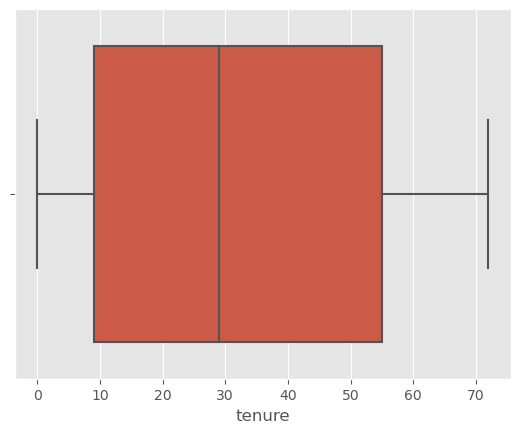

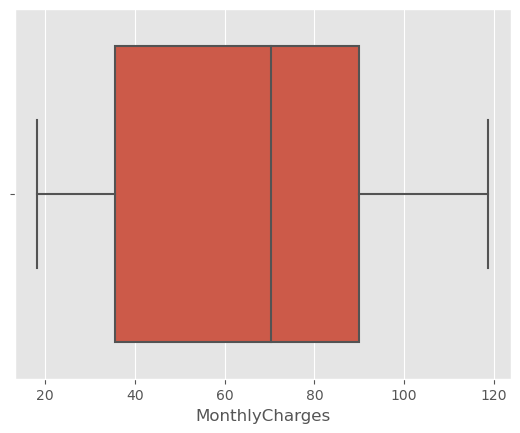

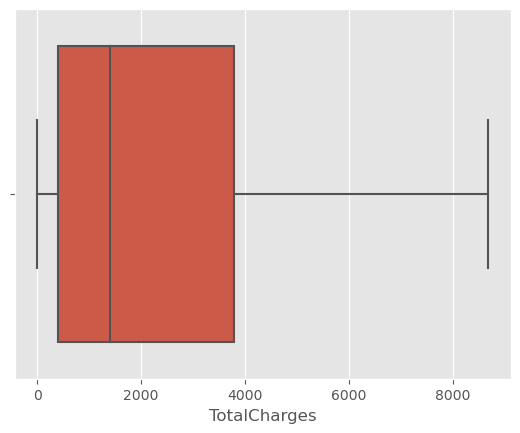

In [138]:
# Outliers check
numeric_df = df.select_dtypes(include=['int', 'float'])

# Plotting boxpots for the numeric columns in the data
for column in numeric_df.columns:
    sns.boxplot(numeric_df, x=column)
    plt.show()

In [139]:
# Extracting cleaned data
df.to_csv(r"C:\Users\nick\OneDrive\Desktop\Code\Teleco_customer_churn_prediction\Data\CleanData.csv")

**Conclusion:**

The data is now completely okay and fulfills all requirements of good quality data.

# Data Exploration

## Univariate Anlaysis

In [140]:
# Subsetting categorical columns to a dataframe
category_df = df.select_dtypes('category')

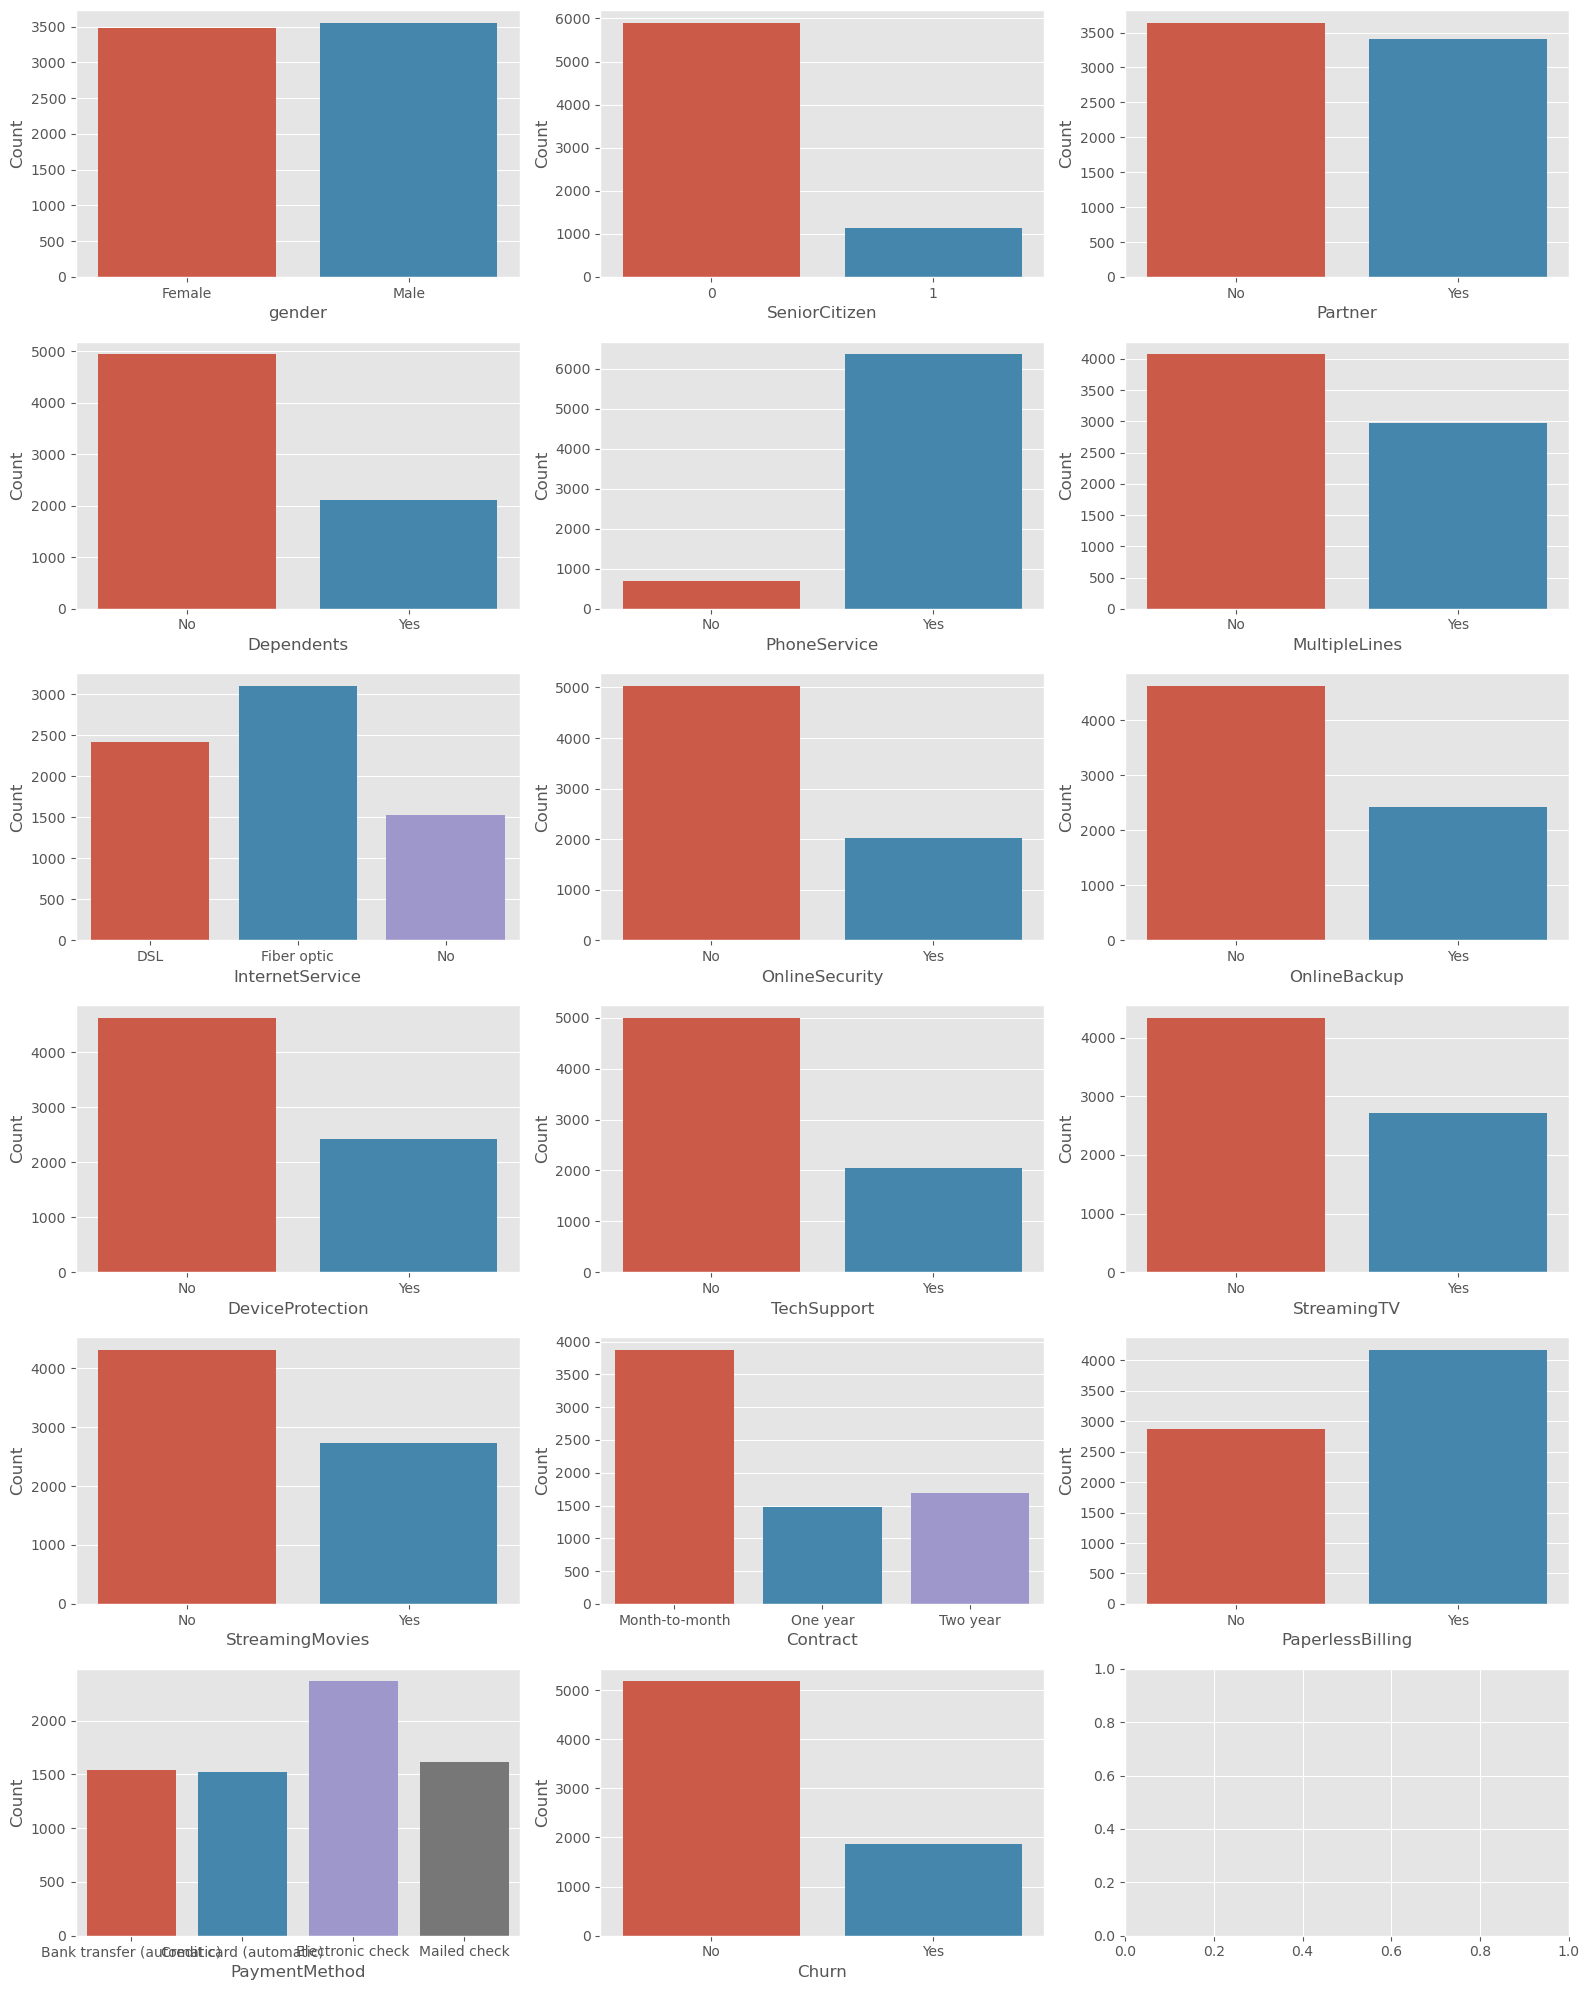

In [141]:
# Creating a countplot for the categorical variables
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(16, 20))

# Looping through the columns for plotting
for i, column in enumerate(category_df.columns.tolist()):
    nrow, ncol = i // 3, i % 3
    axis = ax[nrow, ncol]
    
    # Creating the plot
    sns.countplot(category_df, x=column, ax=axis)
    axis.set_ylabel('Count')
    axis.set_xlabel(str(column))

plt.tight_layout()
plt.show()

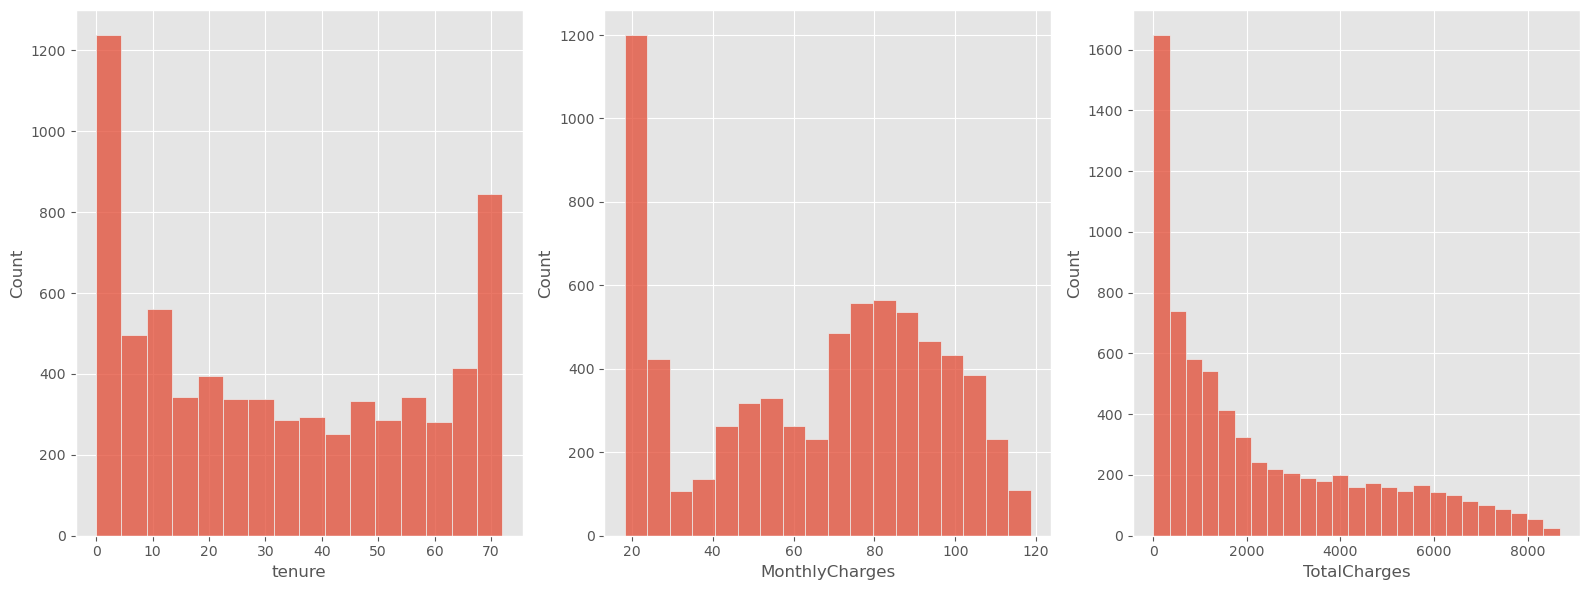

In [142]:
# Creating histograms for the numerical varibles
fig, ax = plt.subplots(ncols=3, figsize=(16, 6))

# Looping through the columns for plotting
for i, col in enumerate(numeric_df.columns.tolist()):
    sns.histplot(data=numeric_df[col], ax=ax[i])

plt.tight_layout()
plt.show()

In [143]:
category_df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

**Conclusions:**

- There is a gender balance in the customers. 
- Only a few of the customers are senior citizens.
- Quite a number of customers have multiple telecom lines
- Most of the customers have subscribes to phone services
- The most popular contact type is month-to-month
- Most customers do not receive tech support
- Most customers don't have subsciption to online security
- Total charges has a right skew distribution which is as to be expected due to the nature of the variable
- Tenure and Monthly-charges have non-normal distributions with monthly charges looking similar to a bimodal distribution.
- There is ~25% churn rate in the company.

## Bivariate Analysis

### Chi-square test for categorical variables

In [144]:
# Label encoding the variables to make them possible to use for a chi2 test
# Encoding the variables
encoded_categories_df = category_df.copy().apply(LabelEncoder().fit_transform)

In [145]:
encoded_categories_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [146]:
def chiSq(dataframe):
    """
    
    """
    columns = dataframe.columns.tolist()  # List of dataframe's columns

    # Creating the results dataframe
    result_df = pd.DataFrame(data=[(0 for i in range(len(columns))) for i in range(len(columns))],
                             columns=columns)
    result_df.set_index(pd.Index(columns), inplace=True)

    # Looping through to perform the chi2 test
    for i in columns:
        for j in columns:
            if i != j:
                test_statistic, p_value = chi2(np.array(dataframe[i]).reshape(-1, 1) , np.array(dataframe[j]).reshape(-1, 1))
                result_df.loc[i, j] = p_value

    return result_df

In [147]:
# Performing the test on the categorical data
chi2_results = chiSq(encoded_categories_df)

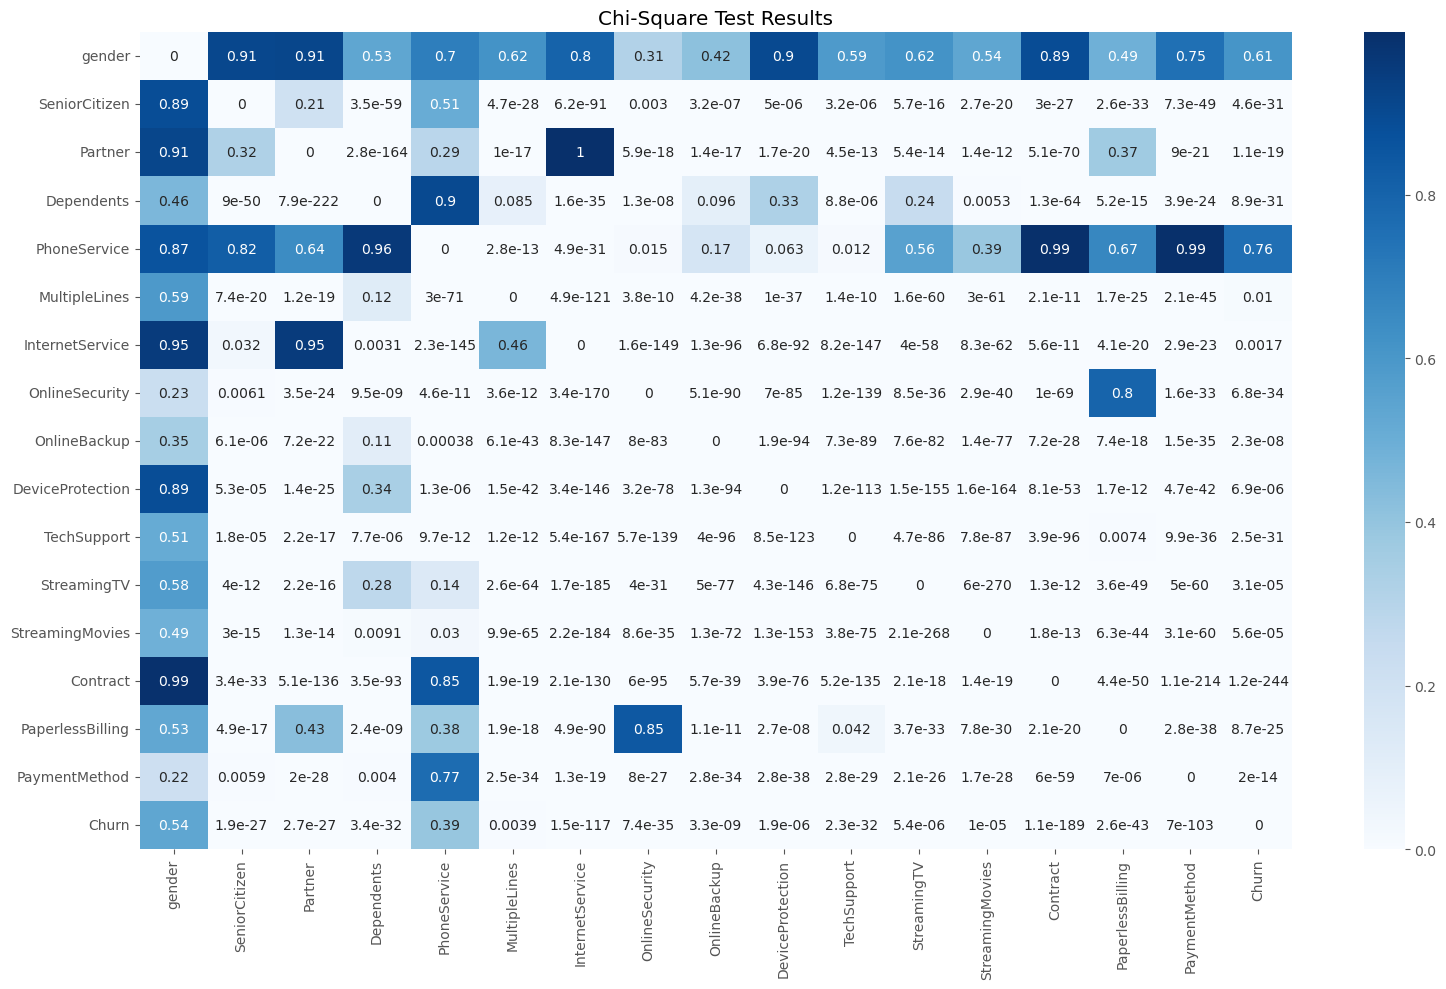

In [148]:
# Creating a heat map for ease in viewing and interpreting the chi2 test results
fig = plt.figure(figsize=(16,10))

sns.heatmap(chi2_results, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.tight_layout()
plt.show()

I will not include: gender, PhoneService, StreamingTV, StreamingMovies, DeviceProtection, MultipleLines, OnlineSecurity, OnlineBackup and Partner in the modelling data.

In [149]:
def scatterplot(dataframe):
    """
    Takes in a dataframe and sorts out the numrical column.
    Creates scatterplots of the numerical data
    """
    columns = dataframe.select_dtypes(include=['int', 'float']).columns.tolist()
    perm = list(permutations(columns, 2))
    perm = [x for x in perm if x[0] != x[1]]
    len_perm = len(perm)

    # Setting up plots
    nrows, ncols = (len_perm/3).__ceil__(), 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 10))

    for i, cols in enumerate(perm):
        a, b = i // 3, i % 3
        sns.scatterplot(data=dataframe, x=cols[0], y=cols[1], ax=ax[a, b])

    plt.tight_layout()
    plt.show()
    

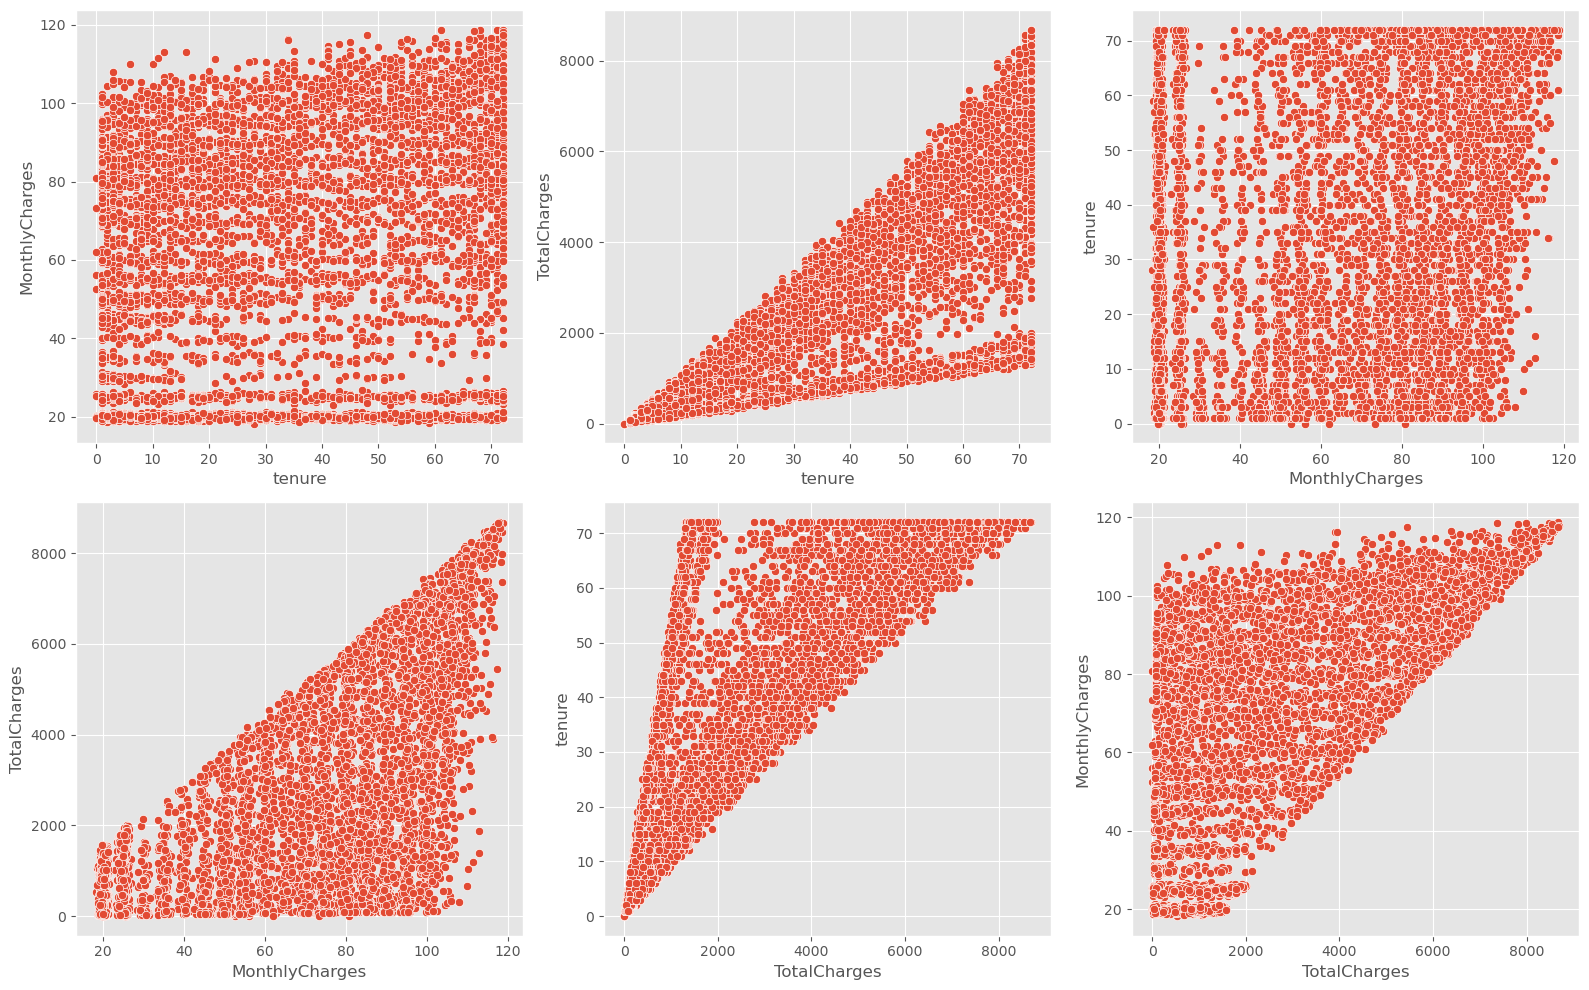

In [150]:
# Plotting the scatterplot
scatterplot(numeric_df)

**Conclusions:**

- There seems to be no relation between tenure and monthly charges
- Total charges and tenure have a seemingly positive relationship

A correlation test should help ascertain the relationshisp.

In [151]:
# Person's correlation test
numeric_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


Monthly charges and tenure are the best numerical features for modelling.


# Data Preprocessing

In [152]:
# Splitting the data into dependent(target) and independent(predictor) variables
# irrelevant_cols = ['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'Partner']
irrelevant_cols = ['customerID']

predictor_df = df.drop(labels=['Churn', 'TotalCharges'] + irrelevant_cols,  axis=1)
target_var = df['Churn']

numeric_cols = predictor_df.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_cols = predictor_df.select_dtypes(exclude=['float', 'int']).columns.tolist()

I will label encode the categorical columns. I will not use other methods since they will increase the data dimensionality by too much.

In [153]:
# Label Encoding the data for ease in modelling
d = defaultdict(LabelEncoder)

predictor_df[categorical_cols] = predictor_df[categorical_cols].apply(lambda x: d[x.name].fit_transform(x))

In [154]:
# Further splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(predictor_df, target_var, random_state=42, test_size=0.25, shuffle=True, stratify=target_var)

In [155]:
# Checking the data shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5282, 18)
(5282,)
(1761, 18)
(1761,)


In [156]:
# Standard scaling the numerical variables
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(x_train[numeric_cols])

x_train[numeric_cols] = scaler.transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


In [157]:
# Encoding the target variables
target_encoder = LabelEncoder()

y_train_enc = target_encoder.fit_transform(y_train)
y_test_enc = target_encoder.transform(y_test)

**Conclusion:**

The data is now ready for modelling.

# Machine Learning Model

A decision tree classifier is used to build a predictor for whether a customer will leave the company or not. The model will be continuously tuned till the optimum metrics are achieved.

In [158]:
# Instantiate the baseline model
baseline_treeModel = DecisionTreeClassifier(random_state=42)

# Fit the model
baseline_treeModel.fit(x_train, y_train_enc)

# perform cross validation with train data
baseline_treeModel_logloss = -(cross_val_score(baseline_treeModel, x_train, y_train_enc, scoring='neg_log_loss').mean())
probs_basetree = baseline_treeModel.predict_proba(x_test)

# compare model scores on test data and train data
print('train:' + str(baseline_treeModel_logloss) + ', test:' + str(log_loss(y_test_enc, probs_basetree)))

train:9.644112548212245, test:9.457267068321297


## Hyperparameter Tuning

In [159]:
# I am going to loop through possible values of depth to find what depth value minimizes log loss
depthLog_loss = []

for number in range(1, 21):
    # initialize, fit and predict using the model
    depthModel = DecisionTreeClassifier(max_depth=number, random_state=42)
    depthModel.fit(x_train, y_train_enc)
    depth_probs = depthModel.predict_proba(x_test)
    
    # perform cross validation
    depth_logLoss_train = -(cross_val_score(depthModel, x_train, y_train_enc, scoring='neg_log_loss').mean())
    depth_logLoss_test = log_loss(y_test_enc, depth_probs)
    
    depthlog_losses = (depth_logLoss_train, depth_logLoss_test)
    depthLog_loss.append(depthlog_losses)
    
depthLog_loss[:10]

[(0.48755419359106666, 0.4857439408702036),
 (0.4652243058093665, 0.46632833719638234),
 (0.44276398034907194, 0.44229690378454845),
 (0.4544913299918118, 0.42554636882714675),
 (0.5307573782151304, 0.504109746129326),
 (0.6777310595933294, 0.6015567548915036),
 (1.0644444683851608, 0.7435977453134343),
 (1.558149785969406, 1.2166875330165963),
 (2.4544931438972752, 1.9337735006230434),
 (3.363468563830748, 3.088234484169493)]

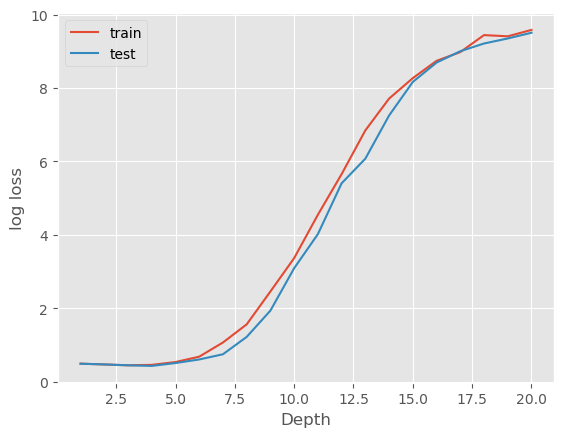

In [160]:
# plot the graph of the log losses
# train log_loss
plt.plot(range(1, 21), np.array(depthLog_loss)[:, 0], label='train')

# test log_loss
plt.plot(range(1, 21), np.array(depthLog_loss)[:, 1], label='test')

# Plot aesthetic
plt.xlabel('Depth')
plt.ylabel('log loss')
plt.legend()
plt.show()

**Conclusion:**

At max depth 3, we have the least logloss on the test data. That is the max depth I am going to use.

In [161]:
# Next I am going to investigate the effect of different values of min_samples_split on log loss
splitLog_loss = []

for number in range(2, 31):
    # initialize, fit and predict using the model
    splitModel = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_split=number)
    splitModel.fit(x_train, y_train_enc)
    split_probs = splitModel.predict_proba(x_test)
    
    # perform cross validation
    split_logLoss_train = -(cross_val_score(splitModel, x_train, y_train_enc, scoring='neg_log_loss').mean())
    split_logLoss_test = log_loss(y_test_enc, split_probs)
    
    splitlog_losses = (split_logLoss_train, split_logLoss_test)
    splitLog_loss.append(splitlog_losses)
    
splitLog_loss[:10]

[(0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845),
 (0.44276398034907194, 0.44229690378454845)]

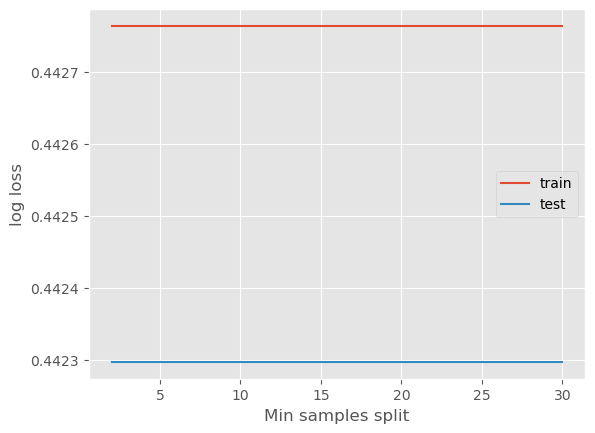

In [162]:
# plot the graph of the above logloss values
# train log_loss
plt.plot(range(2, 31), np.array(splitLog_loss)[:, 0], label='train')

# test log_loss
plt.plot(range(2, 31), np.array(splitLog_loss)[:, 1], label='test')

plt.xlabel('Min samples split')
plt.ylabel('log loss')
plt.legend()
plt.show()

In [163]:
# # Instantiate a LogisticRegression with random_state=42
# baseline_model = LogisticRegression(random_state=42)

# # Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# # on X_train and y_train
# baseline_neg_log_loss_cv = cross_val_score(baseline_model, x_train, y_train_enc, scoring='neg_log_loss')

# baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
# baseline_log_loss

**Conclusion:**

Changing the min_samples_split hyperparameter yields no effect on the model's logloss. 

Since little could be done in hyperparameter tuning. I will resample the data to mitigate the class imbalance in the data to see whether there will be better model performance. 

### Resampling data

Resampling the data using SMOTE to test whether the model performance will improve.


In [164]:
# Instantiate a SMOTE object
sm = SMOTE(random_state = 42)

# Fitting and resampling the data
x_train_res, y_train_res = sm.fit_resample(x_train, y_train_enc.ravel())

In [165]:
# Instantiate the resampled data model
resdata_treeModel = DecisionTreeClassifier(random_state=42)

# Fit the model
resdata_treeModel.fit(x_train_res, y_train_res)

# perform cross validation with resampled train data
resdata_treeModel_logloss = -(cross_val_score(resdata_treeModel, x_train_res, y_train_res, scoring='neg_log_loss').mean())
probs_restree = resdata_treeModel.predict_proba(x_test)

# compare model scores on test data and resampled train data
print('train:' + str(resdata_treeModel_logloss) + ', test:' + str(log_loss(y_test_enc, probs_restree)))

train:8.245571215568669, test:10.13230818965026


In [166]:
# I am going to loop through possible values of depth to find out the difference from the baseline model iterations
resDepthLog_loss = []

for number in range(1, 21):
    # initialize, fit and predict using the model
    resDepthModel = DecisionTreeClassifier(max_depth=number, random_state=42)
    resDepthModel.fit(x_train_res, y_train_res)
    resDepth_probs = resDepthModel.predict_proba(x_test)
    
    # perform cross validation
    resDepth_logLoss_train = -(cross_val_score(resDepthModel, x_train_res, y_train_res, scoring='neg_log_loss').mean())
    resDepth_logLoss_test = log_loss(y_test_enc, resDepth_probs)
    
    resDepthlog_losses = (resDepth_logLoss_train, resDepth_logLoss_test)
    resDepthLog_loss.append(resDepthlog_losses)
    
resDepthLog_loss[:10]

[(0.5533861747323658, 0.5706382123811709),
 (0.5240365102669824, 0.5458692890542494),
 (0.4948814483039615, 0.5138745486623096),
 (0.4773832569456081, 0.5022964015618508),
 (0.5095552662701364, 0.540594888866892),
 (0.599782592011839, 0.5829704883096102),
 (0.7981977059406028, 0.8138251145005178),
 (1.1867130971871465, 1.229612091819729),
 (1.81211266459368, 2.026534617714948),
 (2.719232067619733, 3.026489533030234)]

Class balancing has not brought any preferred changes to the model. In fact the performance seems to be worse.

Therefore I select the decision tree model with depth parameter as 3 is the final model for the problem.

## Final Model

In [167]:
finalModel = DecisionTreeClassifier(max_depth=3, random_state=42)

finalModel.fit(x_train, y_train_enc)
finalModel_probs = finalModel.predict_proba(x_test)
finalModel_preds = finalModel.predict(x_test)

print("log loss: ", log_loss(y_test_enc, finalModel_probs))
print("accuracy: ", accuracy_score(y_test_enc, finalModel_preds))
print("precision:", precision_score(y_test_enc, finalModel_preds))
print("recall:   ", recall_score(y_test_enc, finalModel_preds))
print("f1_score:   ", f1_score(y_test_enc, finalModel_preds))

log loss:  0.44229690378454845
accuracy:  0.7751277683134583
precision: 0.6682464454976303
recall:    0.3019271948608137
f1_score:    0.41592920353982304


In [168]:
target_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [169]:
y_test.value_counts(normalize=True)

Churn
No     0.73481
Yes    0.26519
Name: proportion, dtype: float64

**Model Interpretation**

Accuracy - The final model correctly identifies whether a customer will leave or not ~77% of the time.

Precision - This means that if the model labels a given cell of a customer as a potential churn, there is an ~66% chance that the customer will leave and a ~34% chance that they will not.

Recall - This means that if a customer is actually going to leave, there's a ~30% chance that the model will correctly label them. 

# Conclusions:

The final model's perfomance is way better than random guessing or simply assuming that all or no customers will leave. However, it is not good enough for deployment yet.

# Recommendations:

More study into the data needs to be done. 

Zeroing down on what features are relevant for modelling whether a customer will churn or not.